### IMAGE STITCHING DEMO

Number of Good Matches :  129
Number of Good Matches :  129


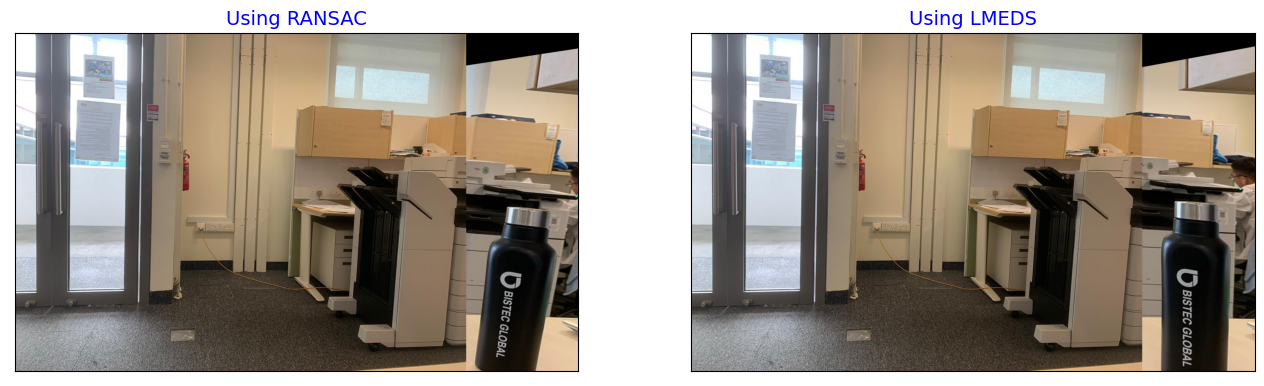

RANSAC HOMOGRAPHY: 
 [[ 2.92556700e+00  2.78150127e-01 -2.98770071e+03]
 [ 4.11486976e-01  2.70692987e+00 -9.79539375e+02]
 [ 1.38371648e-03  9.74013463e-05  1.00000000e+00]]
LMEDS HOMOGRAPHY: 
 [[ 4.93556746e+00  4.24055654e-01 -5.03378606e+03]
 [ 8.40242912e-01  4.58754715e+00 -1.91442740e+03]
 [ 2.42019516e-03  7.35084373e-04  1.00000000e+00]]


In [6]:
import cv2 as cv
from lib.Visualize import show_images
from lib.mrcnn import find_homography

## DEMO
d_im1 = cv.imread('./images/stich1.png')
d_im2 = cv.imread('./images/stich2.png')

# CHOICES {0-> LSM, cv.RANSAC, cv.RHO, cv.LMEDS}
H_ransac = find_homography('./images/','stich1.png','stich2.png',method=cv.RANSAC)         # RANSAC Approximation
H_lmeds  = find_homography('./images/','stich1.png','stich2.png')       # LMEDS Approximation


original_warped_ransac = cv.warpPerspective(d_im2, np.linalg.inv(H_ransac), (2000,1200))
original_warped_ransac[0:d_im1.shape[0], 0:d_im1.shape[1]] = d_im1

original_warped_lmeds = cv.warpPerspective(d_im2, np.linalg.inv(H_lmeds), (2000,1200))
original_warped_lmeds[0:d_im1.shape[0], 0:d_im1.shape[1]] = d_im1

show_images([[original_warped_ransac,'c',"Using RANSAC"],[original_warped_lmeds,'c',"Using LMEDS"]],size=8)
print("RANSAC HOMOGRAPHY: \n",H_ransac)
print("LMEDS HOMOGRAPHY: \n",H_lmeds)

### VisBLE: HOMOGRAPHY BASED MATCHING

In [1]:
# MASK OUT ALL THE AVAILABLE IMAGES
from lib.mrcnn import mask_out_images

DATA_DIR = './images/'
RESULT_DIR = './masked/'

mask_out_images(DATA_DIR,RESULT_DIR)

Using TensorFlow backend.


./images/same_level_1.jpg
Number of Objects Detected: 2
./images/same_level_2.jpg
Number of Objects Detected: 2
./images/stich1.png


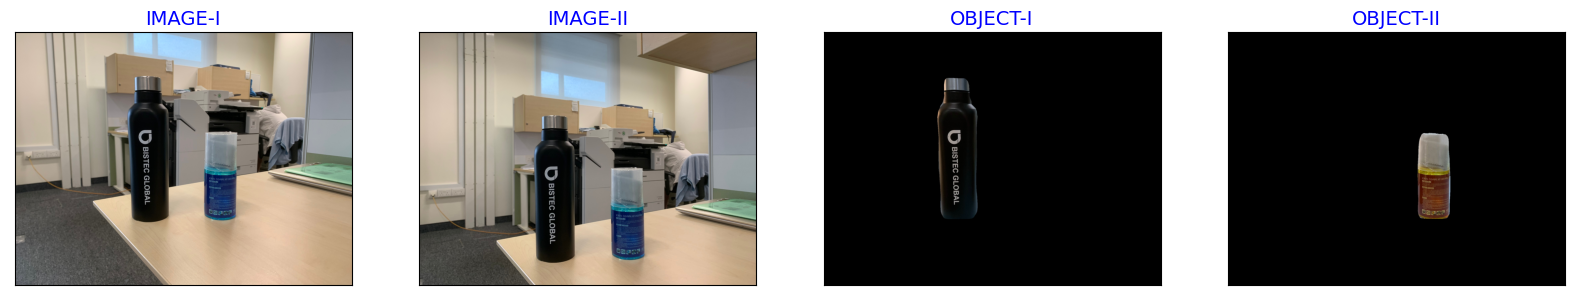

OBJECT - I
Number of Good Matches :  143
|H| = 0.4880993596917991 

OBJECT - II
Number of Good Matches :  339
|H| = 1.1391636780982928


In [2]:
from lib.Visualize import show_images
from lib.mrcnn import find_homography
import numpy as np
import cv2 as cv

file1 = './images/same_level_1.jpg'
file2 = './images/same_level_2.jpg'
mask1 = './masked/same_level_1_1.jpg'
mask2 = './masked/same_level_2_1.jpg'
mask3 = './masked/same_level_1_2.jpg'
mask4 = './masked/same_level_2_2.jpg'

show_images([[cv.imread(file1),'c',"IMAGE-I"],[cv.imread(file2),'c','IMAGE-II'],[cv.imread(mask1),'c','OBJECT-I'],[cv.imread(mask3),'c','OBJECT-II']])
print("OBJECT - I")
H_1 = find_homography(mask1,mask2)
print("|H| =",abs(np.linalg.det(H_1)),'\n')

print("OBJECT - II")
H_2 = find_homography(mask3,mask4)
print("|H| =",abs(np.linalg.det(H_2)))